<a href="https://colab.research.google.com/github/JoeAM11/MachineLearning_EM23/blob/main/Tarea07_ML_Marzo_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dudas 

* Otra vez me dio un algorimto con scores de 1 (perfección) que podría estar haciendo mal? o simplemente esto es algo tan estudiado que funciona muy bien para diabetes?
* Discutir con profesor la interpretación del árbol que me genera con mis datos. 

🤖 📓
# Tarea en clase  #06
#### Nombre :Joel Alejandro Rodarte Rivera 
#### Matrícula: 2173260

El siguiente cuaderno contiene:
* Un algoritmo de árboles de desición para clasificación de presencia o ausencia de diabetes basado en presencia o ausencia de síntomas. 




## Algoritmos no supervisados (Información Binaria)




In [1]:
! git clone https://github.com/JoeAM11/MachineLearning_EM23.git
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
df = pd.read_csv('/content/MachineLearning_EM23/Training.csv') #Importar el csv desde mi repositorio en Guthub

Cloning into 'MachineLearning_EM23'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 78 (delta 35), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (78/78), 1.07 MiB | 2.48 MiB/s, done.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10) #Para evitar que me trunque informacióno o que no despliegue tanta, segun sea necesario 
df = df[df.columns[::-1]] # Me es más logico tener la enfermedad en la primera columna por motivos de organización. 
pd.set_option('display.float_format', '{:.3f}'.format) #que los resultados se impriman con tres decimales


In [5]:
df.drop(columns=['Unnamed: 133'],inplace=True) #no entiendo porque aparecio una nueva columna, por eso la quito. 

In [14]:
# Sets de datos de los pacientes que dado unos síntomas tienen (1) o no tienen  (0) diabetes
# Train = 3445 pacientes - 70%
# Test  = 1475 pacientes - 30%

df_train = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/training_Tarea06.csv') 
df_test = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/Testing_Tarea06.csv') 

In [27]:
# Partir mis datos en entrenamiento y test

# Entrenamiento 
# Variables predictoras (síntomas)
x_train = df_train.drop('prognosis', axis=1) 

# Variable de interés. Presencia o ausencia de diabetes
y_train = df_train.prognosis 


#Test 
# Variables predictoras (síntomas)
x_test = df_test.drop('prognosis', axis=1) 

# Variable de interés. Presencia o ausencia de diabetes
y_test = df_test.prognosis 




In [23]:
# Importar librebría necesario para la clasificación de desición de árbol
from sklearn.tree import DecisionTreeClassifier

In [25]:
# dtc se declara como una clase de la funcion importada
# XXXXXXXXXXXXXXXXXX que significa depth y random state  ZXXXXXXXXXXXXXXXXXXXXXXXXX

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)

# fit del árbol de desición
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
# Predicción basado en el el entremaineto del modelo, utilizando las variables de test para predecir el resultado de y del data set de test. 
y_pred = dtc.predict(x_test)

In [29]:
# Evaluar el algoritmo con accuracy, presicion, recall y F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


[Text(0.5, 0.75, 'x[105] <= 0.5\ngini = 0.048\nsamples = 3445\nvalue = [3361, 84]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3361\nvalue = [3361, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 84\nvalue = [0, 84]')]

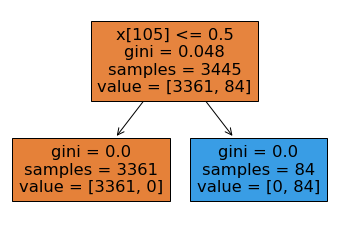

In [47]:
# Opción 1 
from sklearn import tree
import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10,10))
tree.plot_tree(dtc,filled = True,  max_depth=10) 

# lo que entiendo es que está tomando la variable 105 y de ahí dice que tiene 84 1 y 3361 0. 
# ¿Porqué agarra la 105?
  # Pareciera ser que el depth no le afecta, sigue ploteando solo 1
  # x_test.columns.get_loc('polyuria') --> Orinar excesivamente (Tiene sentido!, es uno de los síntomas más comunes de la diabetes)
  # La 105 es polyuria y de hecho si tiene 84 positivos


# ¿Entonces, qué es lo que está haciendo detrás el descicion tree classifier?
  # ¿Será que de alguna manera determina que el diferenciador más importante para determinar si existe diabetes y no confundirlo con otra enfermedad que tengas síntomas similares sea la polyuria?

# https://www.youtube.com/watch?v=EMcNjJ6Gj8w
# Interpretacion parcial
  # Con la variable 105. Si es menor a .5 se va ala izquierda, Si es mayor a .5 se va a la derecha. 
  # Polyuria fue escogido por le split para maximizar el decrecimiento de la impurity de gini / O para incrementar la pureza del nodo.
  # Solo necesito un partición para llegar a mi conclusión de existencia o no existencia de diabetes. 
  # Entre más fuerte sea el color, la rama es más pura. El objetivo pricipal de este algoritmo. 


[Text(0.5, 0.75, 'polyuria <= 0.5\ngini = 0.048\nsamples = 3445\nvalue = [3361, 84]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3361\nvalue = [3361, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 84\nvalue = [0, 84]')]

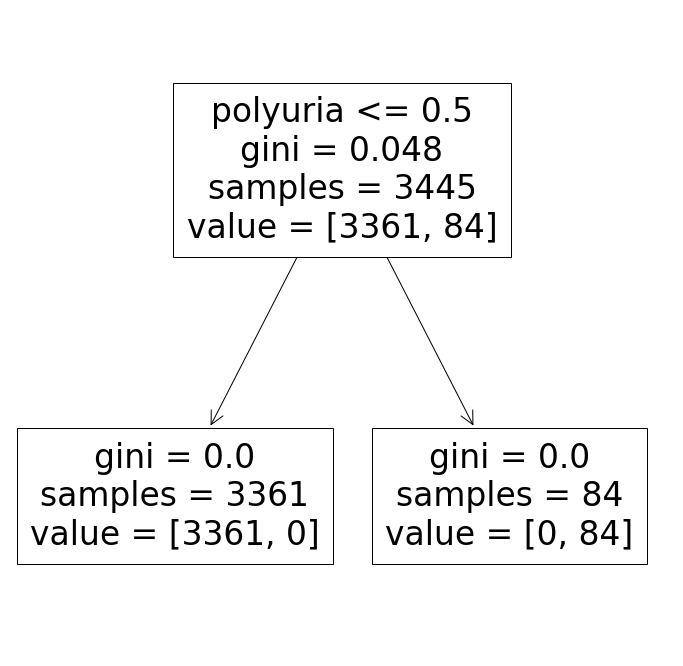

In [33]:
# Opción 2 

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# create a figure to display the tree
fig, ax = plt.subplots(figsize=(12, 12))

# plot the tree
plot_tree(dtc, ax=ax, feature_names=x_train.columns)

# Lesssons Learned 

# Overfitting 
Overfitting is a common problem in machine learning where a model is trained too well on a particular dataset, to the point that it begins to "memorize" the data instead of learning the underlying patterns and relationships.

Overfitting occurs when a model becomes too complex and starts to fit to the noise or random fluctuations in the training data, rather than capturing the underlying patterns. As a result, the model may perform very well on the training data but may perform poorly on new, unseen data.

In other words, overfitting occurs when a model is too specialized to the training data and does not generalize well to new data. This can be a significant issue in machine learning, as the goal is typically to create a model that can accurately predict outcomes on new, unseen data.

To avoid overfitting, various techniques can be employed such as:

Regularization: adding a penalty term to the cost function that discourages the model from fitting the noise in the training data.

Cross-validation: splitting the data into training and validation sets, and using the validation set to monitor the model's performance during training and to tune hyperparameters.

Feature selection: reducing the number of input features to the model to prevent over-reliance on any one feature.

Early stopping: stopping the training process before the model becomes too complex and starts to overfit the data.


# Overfitting Desicione Trees

Un métdo para prevenit overfitting se llama Pruning Desicion Trees. 